<h1> Twitter Analysis


In [74]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# load the dataset
df = pd.read_csv(r'C:\Users\aedan\Data Science Notebooks\Twitter Analysis\sns_twitter_data.csv')
df

,Date,User,Tweet
0,04/11/2022 13:49,Linksfraktion,.@LoetzschMdB: Ex-Bundeskanzler brauchen keine...
1,04/11/2022 12:36,SWagenknecht,Mehr #Diplomatie wagen! Diesem Wunsch einer g...
2,04/11/2022 11:12,SWagenknecht,Abschied von der liberalen Gesellschaft? Im Vi...
3,04/11/2022 08:00,Linksfraktion,"Etwas gesunde Distanz, auch zum eigenen Ego,&a..."
4,03/11/2022 18:15,SWagenknecht,"Grotesk, wie die #Ukraine den brutalen Krieg a..."
...,...,...,...
178693,27/09/2017 20:40,AfDimBundestag,Die #AfD-Fraktion im 19. Deutschen Bundestag w...
178694,27/09/2017 20:35,AfDimBundestag,Die #AfD will im Einklang mit dem Grundgesetz ...
178695,26/09/2017 19:19,AfDimBundestag,+++Dr. @Alice_Weidel &amp; Dr. Alexander Gaula...
178696,26/09/2017 12:10,AfDimBundestag,"93 #AfD-Abgeordnete beraten die Satzung, danac..."


<h3> Data cleaning and manipulation

Before we start we need to classify into tweets from the Afd and Die Linke.

In [76]:
# creating a dictionary
party_dict = {'AndreasKalbitz': 'AfD', 'M_HarderKuehnel': 'AfD', 'AfDProtschka': 'AfD', 'StBrandner': 'AfD', 'P_Plattform': 'AfD', 
        'BjoernHoecke': 'AfD', 'Alice_Weidel': 'AfD', 'Tino_Chrupalla': 'AfD', 'Beatrix_vStorch': 'AfD', 'Frohnmaier_AfD': 'AfD',
        'AfD': 'AfD', 'AfDimBundestag': 'AfD','dieLinke': 'Die_Linke', 'Linksfraktion': 'Die_Linke', 
        'Janine_Wissler':'Die_Linke', 'katjakipping': 'Die_Linke', 'SWagenknecht': 'Die_Linke', 'GregorGysi': 'Die_Linke', 
        'DietmarBartsch': 'Die_Linke', 'Amira_M_Ali': 'Die_Linke', 'schirdewan': 'Die_Linke', 'bodoramelow': 'Die_Linke', 
        'lgbeutin': 'Die_Linke', 'SusanneHennig': 'Die_Linke', 'PetraPauMaHe': 'Die_Linke'}

# adding a new column named 'Party'
df['Party'] = df['User'].map(party_dict)
df.head(6)

,Date,User,Tweet,Party
0,04/11/2022 13:49,Linksfraktion,.@LoetzschMdB: Ex-Bundeskanzler brauchen keine...,Die_Linke
1,04/11/2022 12:36,SWagenknecht,Mehr #Diplomatie wagen! Diesem Wunsch einer g...,Die_Linke
2,04/11/2022 11:12,SWagenknecht,Abschied von der liberalen Gesellschaft? Im Vi...,Die_Linke
3,04/11/2022 08:00,Linksfraktion,"Etwas gesunde Distanz, auch zum eigenen Ego,&a...",Die_Linke
4,03/11/2022 18:15,SWagenknecht,"Grotesk, wie die #Ukraine den brutalen Krieg a...",Die_Linke
5,03/11/2022 12:55,Linksfraktion,.@christian_leye: #Gaspreisbremse droht zu spä...,Die_Linke


In [77]:
# making sure date is a datetime variable
df['Date'] = pd.to_datetime(df['Date'])
df['Date_1'] = df['Date']

# setting the index to our data variable
df = df.set_index(['Date'])
df.head(2)

,User,Tweet,Party,Date_1
Date,,,,
2022-04-11 13:49:00,Linksfraktion,.@LoetzschMdB: Ex-Bundeskanzler brauchen keine...,Die_Linke,2022-04-11 13:49:00
2022-04-11 12:36:00,SWagenknecht,Mehr #Diplomatie wagen! Diesem Wunsch einer g...,Die_Linke,2022-04-11 12:36:00


<h3> Tweet Analysis over time

First we define a function that counts the number of tweets, we base this function on the 'Tweet' column.

In [78]:
def f(x):
     return pd.Series(dict(Number_of_tweets = x['Tweet'].count()))

<h5> Generating and Plotting Daily Tweet Counts

In [79]:
# slicing the df into part afd and part linke
dfl = df[df['Party'] == 'Die_Linke']
print(dfl.shape)

dfa = df[df['Party'] == 'AfD']
print(dfa.shape)

(132060, 4)
(46638, 4)


Then we will use the function created earlier to create two new datasets which entails the amount of daily tweets for each party members.

In [80]:
# creating daily count series for die Linke
daily_count_linke = dfl.groupby(dfl.index.date).apply(f)
print(len(daily_count_linke))
print(daily_count_linke.head(5))

# creating daily count series for the AfD
daily_count_afd = dfa.groupby(dfa.index.date).apply(f)
print(len(daily_count_afd))
print(daily_count_afd.head(5))

4953
            Number_of_tweets
2009-01-04                 3
2009-01-05                 1
2009-01-07                13
2009-01-08                 3
2009-01-09                 2
2680
            Number_of_tweets
2013-01-07                 3
2013-01-08                 4
2013-01-10                 1
2013-02-07                 3
2013-02-09                 3


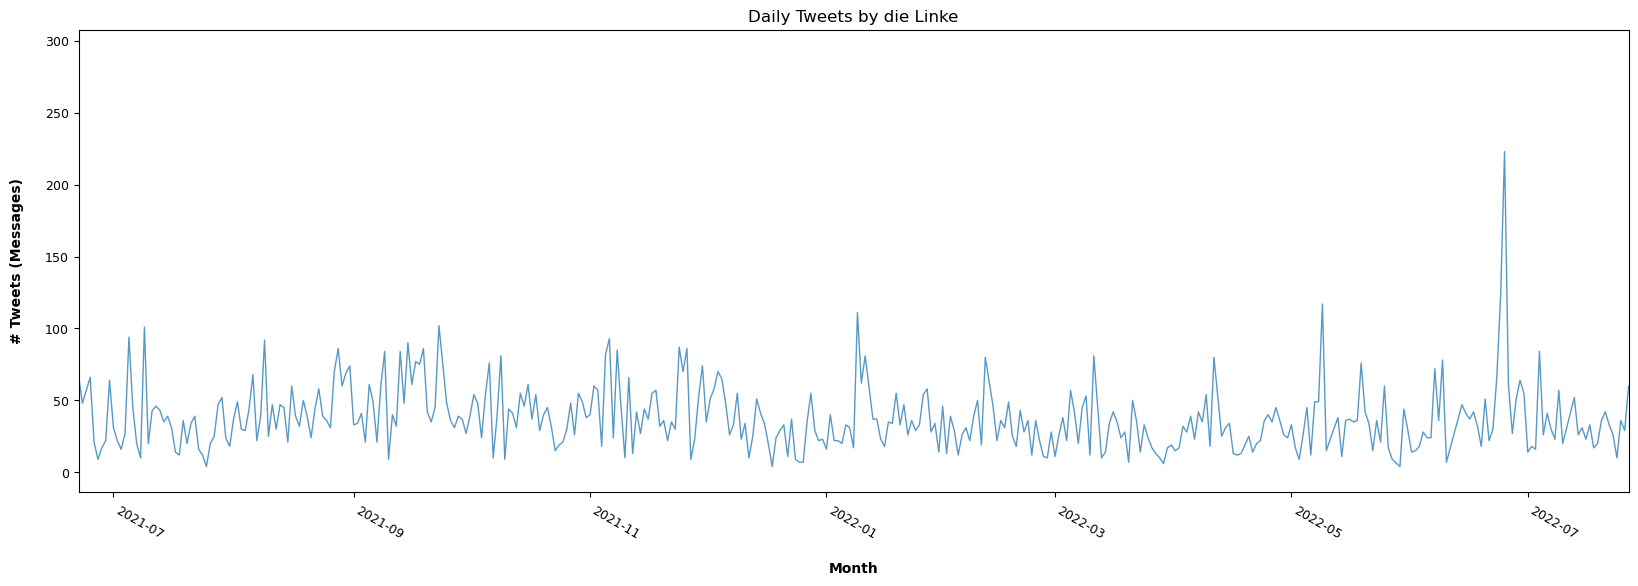

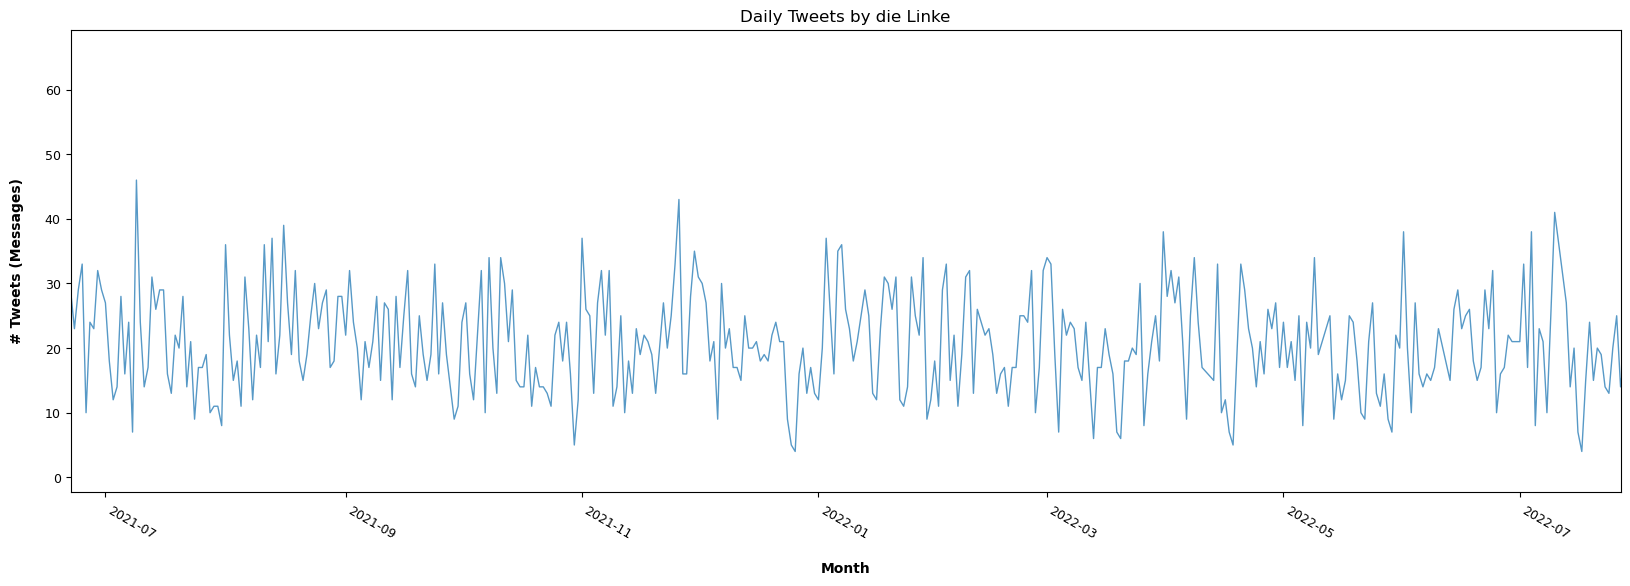

In [81]:
# plotting daily tweets
daily_plot_linke = daily_count_linke['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True, figsize=(20,6))
plt.title('Daily Tweets by die Linke')

# x and y label
daily_plot_linke.set_xlabel('Month', weight='bold', labelpad=15)    
daily_plot_linke.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) 
plt.xticks(fontsize = 9, rotation = -30, ha ="left") 
plt.yticks(fontsize = 9)       

# setting a starting limit
plt.xlim(18800,19200) # 400 is one year

daily_plot_linke.legend_ = None
daily_plot_linke.tick_params(axis='x', pad=5) 
plt.show()
#plt.savefig('daily counts.png', bbox_inches='tight', dpi=300, format='png') 

# plotting daily tweets AfD
daily_plot_afd = daily_count_afd['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True, figsize=(20,6))
plt.title('Daily Tweets by die Linke')

# x and y label
daily_plot_afd.set_xlabel('Month', weight='bold', labelpad=15)    
daily_plot_afd.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) 
plt.xticks(fontsize = 9, rotation = -30, ha ="left")  
plt.yticks(fontsize = 9)       

# setting a starting limit
plt.xlim(18800,19200)

#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
daily_plot_afd.legend_ = None
daily_plot_afd.tick_params(axis='x', pad=5) 
plt.show()
#plt.savefig('daily counts.png', bbox_inches='tight', dpi=300, format='png') 


These plots do not tell us a lot, but what we can see is that there is a high fluctuation between the each day and it seems that the variance of the number of tweets for the AfD is higher compared to die Linke.

<h5> Day of the Week tweets

To do this we will create a new df ny aggregating our df by weekday and then applying our function the we created originally to give us the counts.

In [82]:
# weekday df for die Linke
weekday_count_linke = dfl.groupby(dfl.index.weekday).apply(f)
print(len(weekday_count_linke))
print(weekday_count_linke)

# weekday df for the AfD
weekday_count_afd = dfa.groupby(dfa.index.weekday).apply(f)
print(len(weekday_count_afd))
print(weekday_count_afd)

7
      Number_of_tweets
Date                  
0                18766
1                18583
2                20299
3                20390
4                19828
5                18356
6                15838
7
      Number_of_tweets
Date                  
0                 6689
1                 6920
2                 7159
3                 7457
4                 7379
5                 5702
6                 5332


In [83]:
# changing the numbers from the df to actual days
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# linke
weekday_count_linke['day'] = days
print(weekday_count_linke)

# afd
weekday_count_afd['day'] = days
weekday_count_afd

      Number_of_tweets        day
Date                             
0                18766     Monday
1                18583    Tuesday
2                20299  Wednesday
3                20390   Thursday
4                19828     Friday
5                18356   Saturday
6                15838     Sunday


,Number_of_tweets,day
Date,,
0,6689,Monday
1,6920,Tuesday
2,7159,Wednesday
3,7457,Thursday
4,7379,Friday
5,5702,Saturday
6,5332,Sunday


Generating our day of the week plot

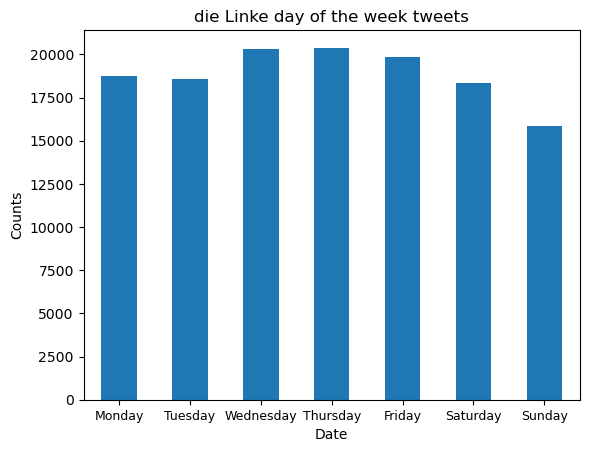

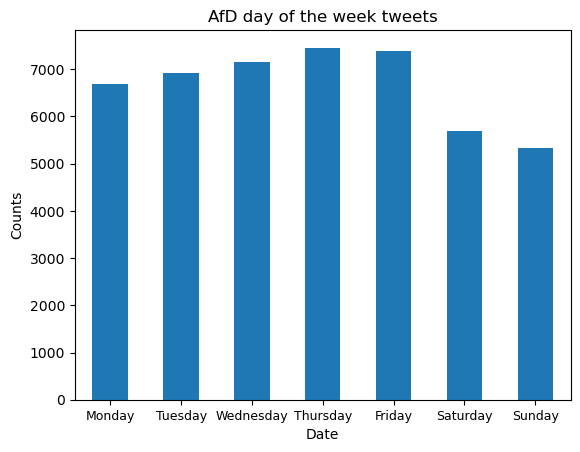

In [84]:
# linke plot
day_of_week_plot_linke = weekday_count_linke['Number_of_tweets'].plot(kind='bar')
plt.title('die Linke day of the week tweets')
plt.ylabel('Counts')
plt.xticks(np.arange(7), weekday_count_linke['day'], rotation = 0, fontsize = 9)
plt.show()

# afd plot
day_of_week_plot_afd = weekday_count_afd['Number_of_tweets'].plot(kind='bar')
plt.title('AfD day of the week tweets')
plt.ylabel('Counts')
plt.xticks(np.arange(7), weekday_count_afd['day'], rotation = 0, fontsize = 9)
plt.show()

In general we can see there are not too many differences between the days, but we can clearly say that there is a drop in tweets on the weekend with Sunday being the day with the least tweets. This may be because politicians are rather inactive and taking rests on the weekend or there just may be less to tweet about on the weekend.

Comparing the two plots of die Linke and AfD we can also observe that the drop from during the week to the weekend is much stronger for AfD politicans.

<h4> Hour of Day Tweets

Same procedure as before but now we access the hour's index attribute.

In [85]:
# linke
hourly_count_linke = dfl.groupby(dfl.index.hour).apply(f)
print(len(hourly_count_linke))
print(hourly_count_linke)

# afd
hourly_count_afd = dfa.groupby(dfa.index.hour).apply(f)
print(len(hourly_count_afd))
print(hourly_count_afd)

24
      Number_of_tweets
Date                  
0                 1137
1                  286
2                   88
3                   27
4                   23
5                   83
6                  479
7                 2194
8                 5044
9                 7942
10                9284
11               10521
12               10418
13               11781
14               11415
15               10599
16                9269
17                8619
18                7561
19                6013
20                5496
21                5477
22                5320
23                2984
24
      Number_of_tweets
Date                  
0                  330
1                  117
2                   48
3                   27
4                   41
5                   91
6                  262
7                  893
8                 2403
9                 3583
10                3952
11                3986
12                3572
13                3525
14                3717
15   

Now lets try to plt the above.

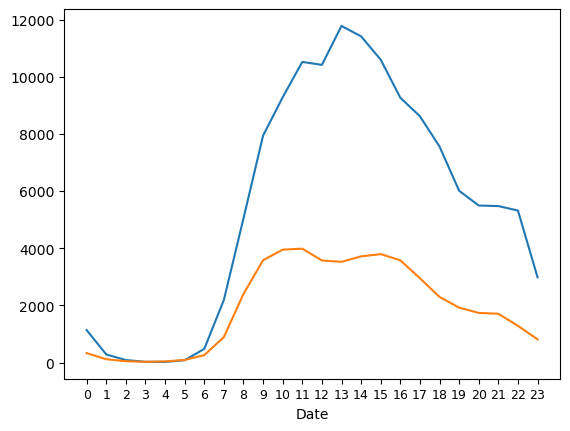

In [86]:
# linke and afd together
hourly_plot_linke = hourly_count_linke['Number_of_tweets'].plot()
hourly_plot_afd = hourly_count_afd['Number_of_tweets'].plot()
plt.xticks(np.arange(24), rotation = 0,fontsize = 9)
plt.show()

Creating seperate plots with hours starting at 1h instead of zero and with bars instead of lines.

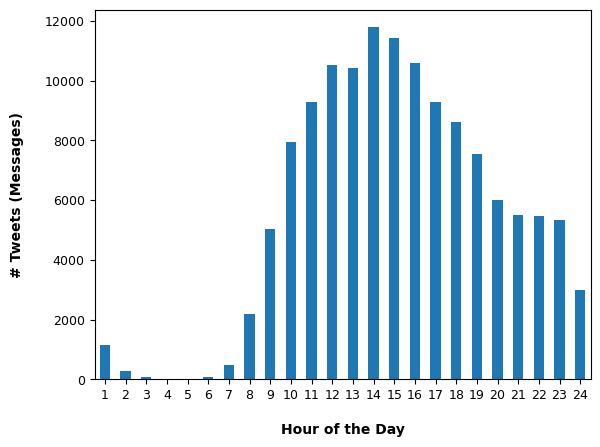

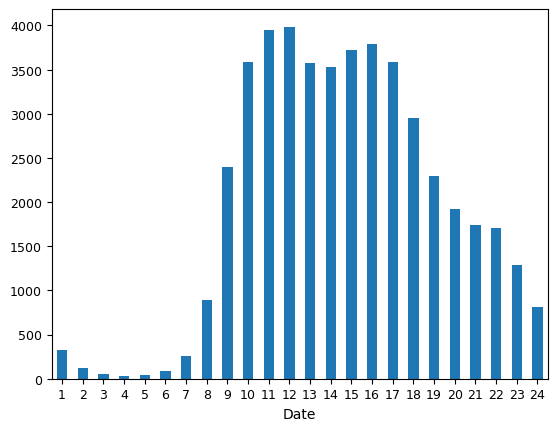

In [87]:
# die Linke plot
hourly_plot_linke = hourly_count_linke['Number_of_tweets'].plot(kind='bar')
hours = list(range(1,25))                                                 
plt.xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   

hourly_plot_linke.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     
hourly_plot_linke.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) 

plt.xticks(fontsize = 9, rotation = 0, ha= "center")                          
plt.yticks(fontsize = 9)                                                      
daily_plot_linke.tick_params(axis='x', pad=5)                                   

daily_plot_linke.legend_ = None     
plt.show()                                            

# afd plot
hourly_plot_linke_afd = hourly_count_afd['Number_of_tweets'].plot(kind='bar')
hours = list(range(1,25))                                                 
plt.xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   

hourly_plot_afd.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     
hourly_plot_afd.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) 

plt.xticks(fontsize = 9, rotation = 0, ha= "center")                          
plt.yticks(fontsize = 9)                                                      
daily_plot_afd.tick_params(axis='x', pad=5)                                   

daily_plot_afd.legend_ = None     
plt.show()                      

The two plots show two things. AfD politicians seem to start tweeting earlier, while politicians of die Linke tweet more in the evening. Also AfD politicians peak tweet time seems to be four to five hours before that of their counterpart, which seems to be in line with them tweeting at later hours.

Going into more detail, politicians on both sides basically do not tweet in the night between 2am and 5/6am. At 7am politicans of die Linke post on average 2194 tweets, while politicians of the AfD 893. Remember, our sample has almost three times as many tweets from die Linke than from the AfD. But at 7am die Linke has only a bit more than 2 times as many tweets. This could be because politician from the AfD get up ealier or they are just more active in the morning on Twitter.

<h5>Heatmaps 

To have a deeper look into the tweets over the day, we will now plot heatmaps that show the amount of tweets per hour by day.

In [208]:
# generating heatmaps

# generating a copy of the df to overcome setting with copy warning
dfl_copy = dfl.copy()

dfl_copy['hour_num'] = dfl.loc[:,'Date_1'].dt.strftime("%H")
dfl_copy['day_num'] = dfl.loc[:,'Date_1'].dt.weekday

# grouping according to the three values and generating a series
g = dfl_copy.groupby(['day_num','hour_num','Party'])
tweet_cnt_linke = g.Tweet.nunique()

tweet_cnt_linke


day_num  hour_num  Party    
0        00        Die_Linke    133
         01        Die_Linke     35
         02        Die_Linke     13
         03        Die_Linke      4
         05        Die_Linke     17
                               ... 
6        19        Die_Linke    910
         20        Die_Linke    838
         21        Die_Linke    832
         22        Die_Linke    774
         23        Die_Linke    386
Name: Tweet, Length: 166, dtype: int64

In [209]:
tweet_cnt_df_linke = tweet_cnt_linke.unstack('hour_num')
pd.set_option('display.max_columns', None)
tweet_cnt_df_linke

,hour_num,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_num,Party,,,,,,,,,,,,,,,,,,,,,,,,
0,Die_Linke,133.0,35.0,13.0,4.0,NaN,17.0,65.0,312.0,720.0,1065.0,1128.0,1432.0,1569.0,1940.0,1690.0,1530.0,1320.0,1179.0,1043.0,793.0,789.0,787.0,753.0,443.0
1,Die_Linke,144.0,36.0,11.0,5.0,3.0,15.0,74.0,320.0,777.0,1020.0,1252.0,1508.0,1444.0,1624.0,1633.0,1648.0,1394.0,1226.0,973.0,789.0,714.0,756.0,790.0,418.0
2,Die_Linke,146.0,46.0,10.0,1.0,3.0,6.0,85.0,356.0,711.0,1187.0,1406.0,1549.0,1616.0,1733.0,1892.0,1720.0,1497.0,1424.0,1168.0,935.0,808.0,820.0,780.0,391.0
3,Die_Linke,177.0,29.0,10.0,6.0,NaN,9.0,82.0,325.0,729.0,1276.0,1432.0,1598.0,1553.0,1901.0,1693.0,1665.0,1517.0,1337.0,1198.0,911.0,818.0,846.0,766.0,502.0
4,Die_Linke,161.0,45.0,17.0,4.0,6.0,7.0,74.0,371.0,762.0,1171.0,1387.0,1682.0,1638.0,1822.0,1774.0,1666.0,1416.0,1328.0,1099.0,821.0,750.0,699.0,712.0,409.0
5,Die_Linke,184.0,35.0,15.0,2.0,8.0,18.0,62.0,276.0,772.0,1207.0,1495.0,1529.0,1455.0,1486.0,1498.0,1279.0,1233.0,1169.0,1095.0,851.0,774.0,735.0,739.0,424.0
6,Die_Linke,189.0,60.0,12.0,5.0,3.0,11.0,37.0,234.0,572.0,1015.0,1182.0,1222.0,1132.0,1268.0,1235.0,1088.0,885.0,956.0,984.0,910.0,838.0,832.0,774.0,386.0


Filling missing values

In [210]:
# filling missing values
tweet_cnt_df_linke.fillna(0, inplace=True)

Doing the same for the AfD data

In [216]:
# generating heatmaps

# generating a copy of the df to overcome setting with copy warning
dfa_copy = dfa.copy()

dfa_copy['hour_num'] = dfa.loc[:,'Date_1'].dt.strftime("%H")
dfa_copy['day_num'] = dfa.loc[:,'Date_1'].dt.weekday

# grouping according to the three values and generating a series
g = dfa_copy.groupby(['day_num','hour_num','Party'])
tweet_cnt_afd = g.Tweet.nunique()

# pivoting the data
tweet_cnt_df_afd = tweet_cnt_afd.unstack('hour_num')
pd.set_option('display.max_columns', None)

# filling missing values
tweet_cnt_df_afd.fillna(0, inplace=True)

tweet_cnt_df_afd

,hour_num,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_num,Party,,,,,,,,,,,,,,,,,,,,,,,,
0,AfD,48,13,8,4,6,13,47,141,354,511,551,612,580,519,545,491,491,362,325,228,256,277,189,117
1,AfD,38,16,9,5,6,15,45,158,417,523,593,542,499,532,582,571,548,444,315,238,231,270,215,107
2,AfD,52,15,6,5,6,12,36,169,396,525,607,568,489,563,567,604,581,478,367,301,223,250,203,136
3,AfD,58,10,4,1,9,11,31,116,310,540,641,660,582,542,611,655,612,480,382,318,312,274,177,120
4,AfD,56,30,13,5,3,11,47,123,338,599,655,654,588,602,622,621,592,479,326,286,217,209,176,126
5,AfD,41,9,4,4,4,13,28,114,277,466,462,509,466,401,442,455,411,371,263,243,230,203,171,111
6,AfD,37,24,4,3,7,16,28,72,311,419,443,440,367,363,347,397,345,335,319,308,270,225,153,98


Heatmaps

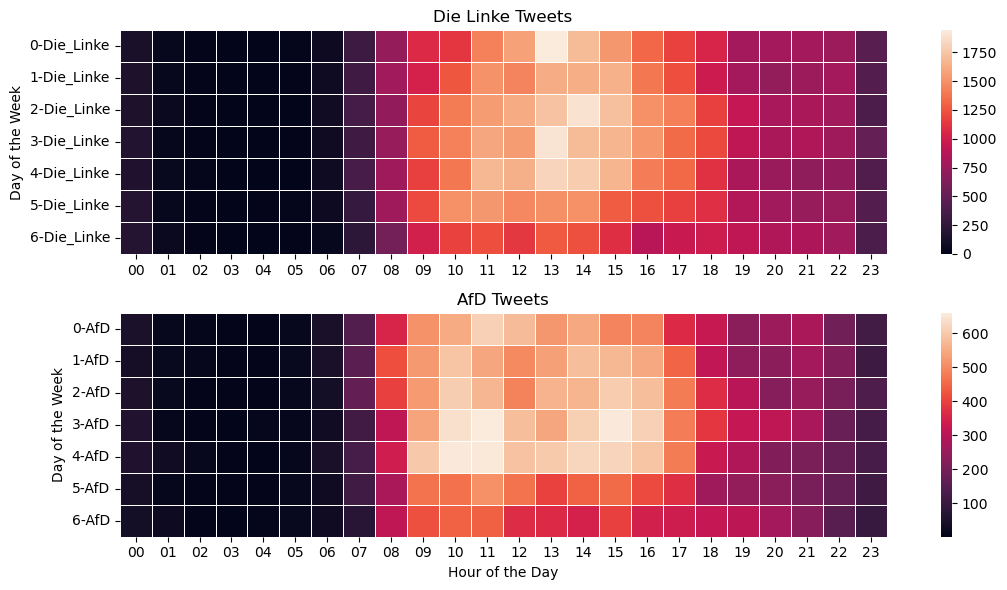

In [234]:
# generating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))

sns.heatmap(tweet_cnt_df_linke,linewidth=0.4, linecolor='w', square=True, ax=ax1)
sns.heatmap(tweet_cnt_df_afd, linewidth=0.4, linecolor='w', square=True, ax=ax2)

# setting labels and titles
ax1.set_title('Die Linke Tweets')
ax2.set_title('AfD Tweets')
ax1.set_ylabel('Day of the Week')
ax2.set_ylabel('Day of the Week')
ax1.set_xlabel('')
ax2.set_xlabel('Hour of the Day')
plt.tight_layout()
plt.show()

Again, we can see that the downtime of tweeting are the same for both parties, which are from 12am to 6/7am.

Like before, we also see that the AfD has two peak times, one at 10/11am on Thursday and Friday, while the Linke only has one at 1/2pm on Monday Wednesday and Thursday.

According to Marc Biadacz, a CDU MP of the Bundestag, meetings in the Bundestag are usually on Thursday and Fridays starting at 9am and finishing in the late afternoon or in the early evening on Thursday. While on Friday they usualy end at noon. From the heatmaps we can clearly see that the politicians of the AfD tweet the most during these meetings. Instead of listening to the speakers they tend to prefer browsing on their phone and sending tweets. This is in line with their nickname as a 'Protestpartei' i.e. an anti establishment party. They like to critic the speakers especially during these times.

We see politicians of the Linke tweet way less during these meetings in the mornings but they still peak on Thursday shortly after noon. Similar to the AfD the Linke also likes to tweet during these meetings.

All the differences we see here are likely due to different schedules. While there are common events such as fraction gatherings or Bundestags metting, the politicians also have their own individual mettings.